# Wine Dataset

In [1]:
import sys  
sys.path.insert(0, '../')
import deep_forest
import torch as th
from torch import nn as nn
import matplotlib.pyplot as plt
%matplotlib inline
from math import pi
import seaborn as sns
from preprocess import get_data
from tqdm import tqdm
sns.set_theme("notebook")
sns.set_style('whitegrid')

## Get Data

In [2]:
x, y, test_data, test_labels = get_data(100)

## Deep Forest

In [3]:
model = deep_forest.DeepForest(100, 2, 13, 0.25, 10)

In [4]:
%time model.train(2500, x, y)
print("\n==============\nFINAL ACC: %s" % str(th.mean((model.forward(model.trees,x) == y).float())))

Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


CPU times: user 1.1 s, sys: 250 ms, total: 1.35 s
Wall time: 5min 6s

FINAL ACC: tensor(0.9888)


In [5]:
imp = model.compute_importance(x)
print()
print(dict(imp))

100%|██████████| 104/104 [09:41<00:00,  5.59s/it]


{9: 0.12901911569299418, 7: 0.03413732082112822, 2: 0.03831516656357483, 0: 0.08113110757896909, 12: 0.07172012822735166, 5: 0.06886415652787505, 8: 0.04768183681479027, 4: 0.029762313880724766, 6: 0.17244891937497925, 1: 0.10225636144755837, 3: 0.08371447872179655, 10: 0.05330732668144722, 11: 0.08764176766681057}


Text(0.5, 1.0, 'Wine Deep Forest Importance')

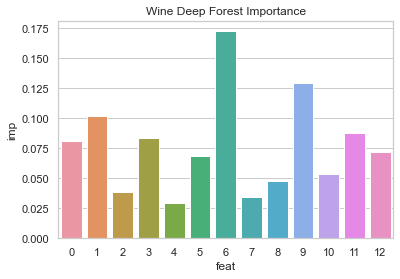

In [6]:
import pandas as pd
data = pd.DataFrame({"feat": list(imp.keys()), "imp": list(imp.values())})
sns.barplot(x="feat", y="imp", data=data).set_title("Wine Deep Forest Importance")

## MLP Baseline

In [7]:
mlp = nn.Sequential(
    nn.Linear(13, 30),
    nn.LeakyReLU(),
    nn.Linear(30, 15),
    nn.LeakyReLU(),
    nn.Linear(15, 3),
    nn.Softmax()
)

optimizer = th.optim.Adam(mlp.parameters())
pbar = tqdm(range(1000))
for i in pbar:
    optimizer.zero_grad()

    preds = mlp(x)
    loss = nn.functional.cross_entropy(preds, y)
    loss.backward()
    optimizer.step()

    pbar.set_description("EPOCH %d || Acc: %s || Loss: %s" % (i, str(th.mean((th.argmax(mlp(x), 1) == y).float())), str(loss)))

print("\n\n==============\nFINAL ACC: %s" % str(th.mean((th.argmax(mlp(x[:]), 1) == y[:]).float())))

  0%|          | 0/1000 [00:00<?, ?it/s]Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
EPOCH 999 || Acc: tensor(0.6629) || Loss: tensor(0.8808, grad_fn=<NllLossBackward>): 100%|██████████| 1000/1000 [00:33<00:00, 30.04it/s]



FINAL ACC: tensor(0.6629)


## Random Forest

In [8]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(max_depth=2)
clf.fit(x.numpy(), y.numpy())
print(clf.score(x.numpy(), y.numpy()))

0.9831460674157303


Text(0.5, 1.0, 'Wine Random Forest Importance')

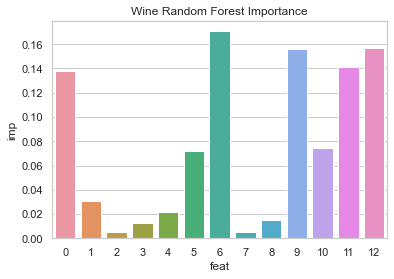

In [9]:
data = pd.DataFrame({"feat": list(range(13)), "imp": clf.feature_importances_})
sns.barplot(x="feat", y="imp", data=data).set_title("Wine Random Forest Importance")